# Exploratory Data Analysis – Mini Project

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

# Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. 

# Data Preprocessing:
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:


# 1.	Import the necessary libraries and read the data.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to display all columns
pd.options.display.max_columns=500
pd.options.display.max_rows=500

In [35]:
df=pd.read_csv(r"C:\Users\M.NITHIN\Desktop\EDA\EDA _Mini Project\MOHAN\fifa.csv")

In [36]:
df.columns.value_counts().sum()

60

# 2.Drop any columns that you deem unecessary for analysis.

In [37]:
df.drop(labels=["ID","Photo","Flag","Club Logo","Jersey Number","Body Type","Work Rate","Loaned From"],axis=1,inplace=True,)

# INTERPRETATION:
    
    THERE ARE 8 COLUMNS THAT SEEMS TO BE UNECESSARY FOR THE ANALYSIS.
    DROPPED COLUMNS ARE ("ID","Photo","Flag","Club Logo","Jersey Number","Body Type","Work Rate","Loaned From")
    
    A) "Id" - ALL THE VALUES ARE UNIQUE HENCE it doent make any change to the dependent variables
    B) "Photo" - There are links for the pictures in the values so it has been dropped
    C) "Flag" - This wont help in analysis the performance and wages of the players
    D) "Club Logo" - This wont help in analysis the performance and wages of the players
    E) "Jersey Number" - Jersey number columns seems to be unncessary as this isnt going to give any insights about the             performance of player
    F) "Body Type" - It wont play a major role in finding the insights about the performance of player
    G) "Work Rate" - Cannot interpret the columns as how it is independent as makes an impact to the target variable
    H) "Loaned From" - It has more than 75% of Null value hence it is dropped.

# 3.The following columns need to be converted for further analysis:

# Column    -     Details     -   Required output
1) 'Value' - Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	- Convert to Float after getting rid of currency symbol and suffix.

2) 'Wage'- Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. -	Convert to Float after getting rid of currency symbol and suffix.

3) 'Joined'	- Year as a string, in some cases complete date as string -	Convert to int with only year

4) 'Contract Valid Until' -	Date as a string  -	Convert to datetime type

5) 'Height' -	In inches with a quotation mark  -	Convert to Float with decimal points

6) 'Weight' -	Contains the suffix lbs - Remove the suffix and convert to float

7) 'Release Clause' -	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. - 	Convert to Float after getting rid of currency symbol and suffix.



# 3.1. Value 
(Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. - Convert to Float after getting rid of currency symbol and suffix.)

In [38]:
df["Value"]=list(map(lambda x : x.replace("€",""),df["Value"]))

In [39]:
for i in df.index:
    if df["Value"][i][-1]=="M":
        df["Value"][i]=float(df["Value"][i].replace("M",""))*1000000
    elif df["Value"][i][-1]=="K":
        df["Value"][i]=float(df["Value"][i].replace("K",""))*1000

C:\Users\M.NITHIN\AppData\Local\Temp\ipykernel_22720\983814212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Value"][i]=float(df["Value"][i].replace("M",""))*1000000
C:\Users\M.NITHIN\AppData\Local\Temp\ipykernel_22720\983814212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Value"][i]=float(df["Value"][i].replace("K",""))*1000


In [40]:
df["Value"]=df["Value"].astype(np.number)

In [41]:
df["Value"].dtype

dtype('float64')

# INTERPRETATION:
    
    1. USING LAMBDA MAP FUNCTION "€" symbol has been replaced with empty string
    2. AFTER THAT USING FOR LOOP ACCESSING THE EACH INDEX AND USING IF CONDITION ALL THE "M" HAS BEEN CHANGED TO "1000000"          AND ALL THE "K" HAS BEEN CHANGED TO "1000" 
    3. FINALLY USING AS TYPE IT HAS BEEN CHANGED TO FLOAT64

# 3.2. WAGE
(Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. - Convert to Float after getting rid of currency symbol and suffix.)

In [42]:
df["Wage"]=list(map(lambda x : x.replace("€",""),df["Wage"]))

In [43]:
for i in df["Wage"].index:
    if df["Wage"][i][-1]=="K":
        df["Wage"][i]=float(df["Wage"][i].replace("K",""))*1000

C:\Users\M.NITHIN\AppData\Local\Temp\ipykernel_22720\2926636602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wage"][i]=float(df["Wage"][i].replace("K",""))*1000


In [44]:
df["Wage"]=df["Wage"].astype(np.number)

# INTERPRETATION:
    
    1. USING LAMBDA MAP FUNCTION "€" symbol has been replaced with empty string
    2. AFTER THAT USING FOR-LOOP ACCESSING THE EACH INDEX AND USING IF CONDITION ALL THE "K" HAS BEEN CHANGED TO "1000" 
    3. FINALLY USING AS TYPE IT HAS BEEN CHANGED TO FLOAT64

# 3.3. JOINED
(Year as a string, in some cases complete date as string - Convert to int with only year)

In [45]:
df.dropna(subset=["Joined"],inplace=True)

In [46]:
df["Joined"]=list(map(lambda x: int(x.split(",")[-1].strip()), df["Joined"]))

# INTERPRETATION:
    
    1. NAN Values has been dropped since it has 8% of nan Values.
    2. After that using LAMBDA map function it has been split using delimiter and stripped the space using sting function          and changed to INT by giving int to the whole condition so that it will give the int vaues in the output

# 3.4.Contract Valid Until

(Date as a string - Convert to datetime type)

In [47]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

# INTERPRETATION:

1. Coverted into datetime format

# 3.5.Height
(In inches with a quotation mark - Convert to Float with decimal points)

In [48]:
df["Height"]=list(map(lambda x : float(str(x).replace("'",".")),df["Height"]))

In [49]:
df["Height"].dtype

dtype('float64')

# INTERPRETATION:

1. The height has been converted into float after removing the " ' ". using lambda map function

# 3.6.Weight
( Contains the suffix lbs - Remove the suffix and convert to float)

In [50]:
df["Weight"]=list(map(lambda x: float(str(x).replace("lbs","")),df["Weight"]))

In [51]:
df["Weight"].dtype

dtype('float64')

# INTERPRETATION:

1. The Weight has been converted into float after removing the "lbs" using lambda map function

# 3.7. Release Clause
(Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. - Convert to Float after getting rid of currency symbol and suffix.)

In [52]:
df.dropna(subset=["Release Clause"],inplace=True)

In [53]:
df["Release Clause"] = list(map(lambda x : str(x).replace("€",""),df["Release Clause"]))

In [54]:
df["Release Clause"] = list(map(lambda x : float(x[:-1])*1000000 if x[-1] == "M" else float(x[:-1])*1000,df["Release Clause"]))

In [59]:
df["Release Clause"]

0       226,500,000.000000
1       127,100,000.000000
2       228,100,000.000000
3       138,600,000.000000
4       196,400,000.000000
               ...        
18202       143,000.000000
18203       113,000.000000
18204       165,000.000000
18205       143,000.000000
18206       165,000.000000
Name: Release Clause, Length: 16643, dtype: float64

# INTERPRETATION:

1. Since there is below 10% of null values in "Release Clause" it has been droppped
2. USING LAMBDA MAP FUNCTION "€" symbol has been replaced with empty string
3. AFTER THAT USING LAMBDA MAP FUNCTION ALL THE "M" HAS BEEN CHANGED TO "1000000" AND ALL THE "K" HAS BEEN CHANGED TO "1000" AND CONVERTED TO FLOAT

# 4.Check for missing values and do a mean imputation where necessary.

In [60]:
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping   

# INTERPRETATION: 

There is no NULL VALUES present in data to do mean imputation. As this all has been treated above


# Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players.


2.	Generate pair plots for the following variables:(Overall, Value, Wage, International Reputation, Height, Weight, Release Clause)


3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

    a)	What would the average wage for this set of players be?
    
    b)	What is the average age?
    
    c)	Is there a correlation between the Overall rating and Value for these players?


4.	Generate tables containing the top 5 players by Overall rating for each unique position.

    a)	Are there any players appearing in more than one Table. Please point out such players.
    
    b)	What is the average wage one can expect to pay for the top 5 in every position?


# E.A.1. 

Plot the distribution of Overall rating for all players.

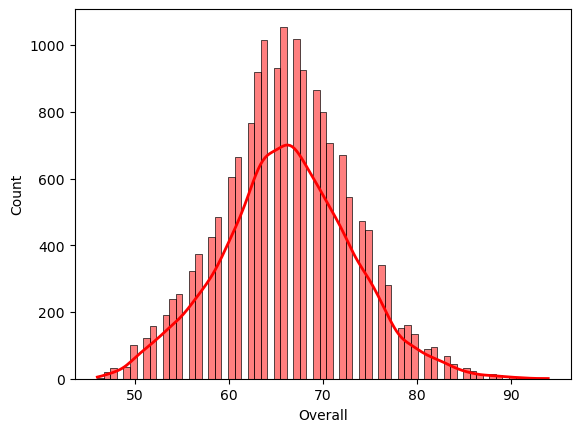

In [61]:
sns.histplot(df["Overall"],color="red",kde=True,line_kws={'color': "blue", 'linewidth': 2, 'linestyle':'-'})
plt.savefig('Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# E.A.2.

Generate pair plots for the following variables:(Overall, Value, Wage, International Reputation, Height, Weight, Release Clause)

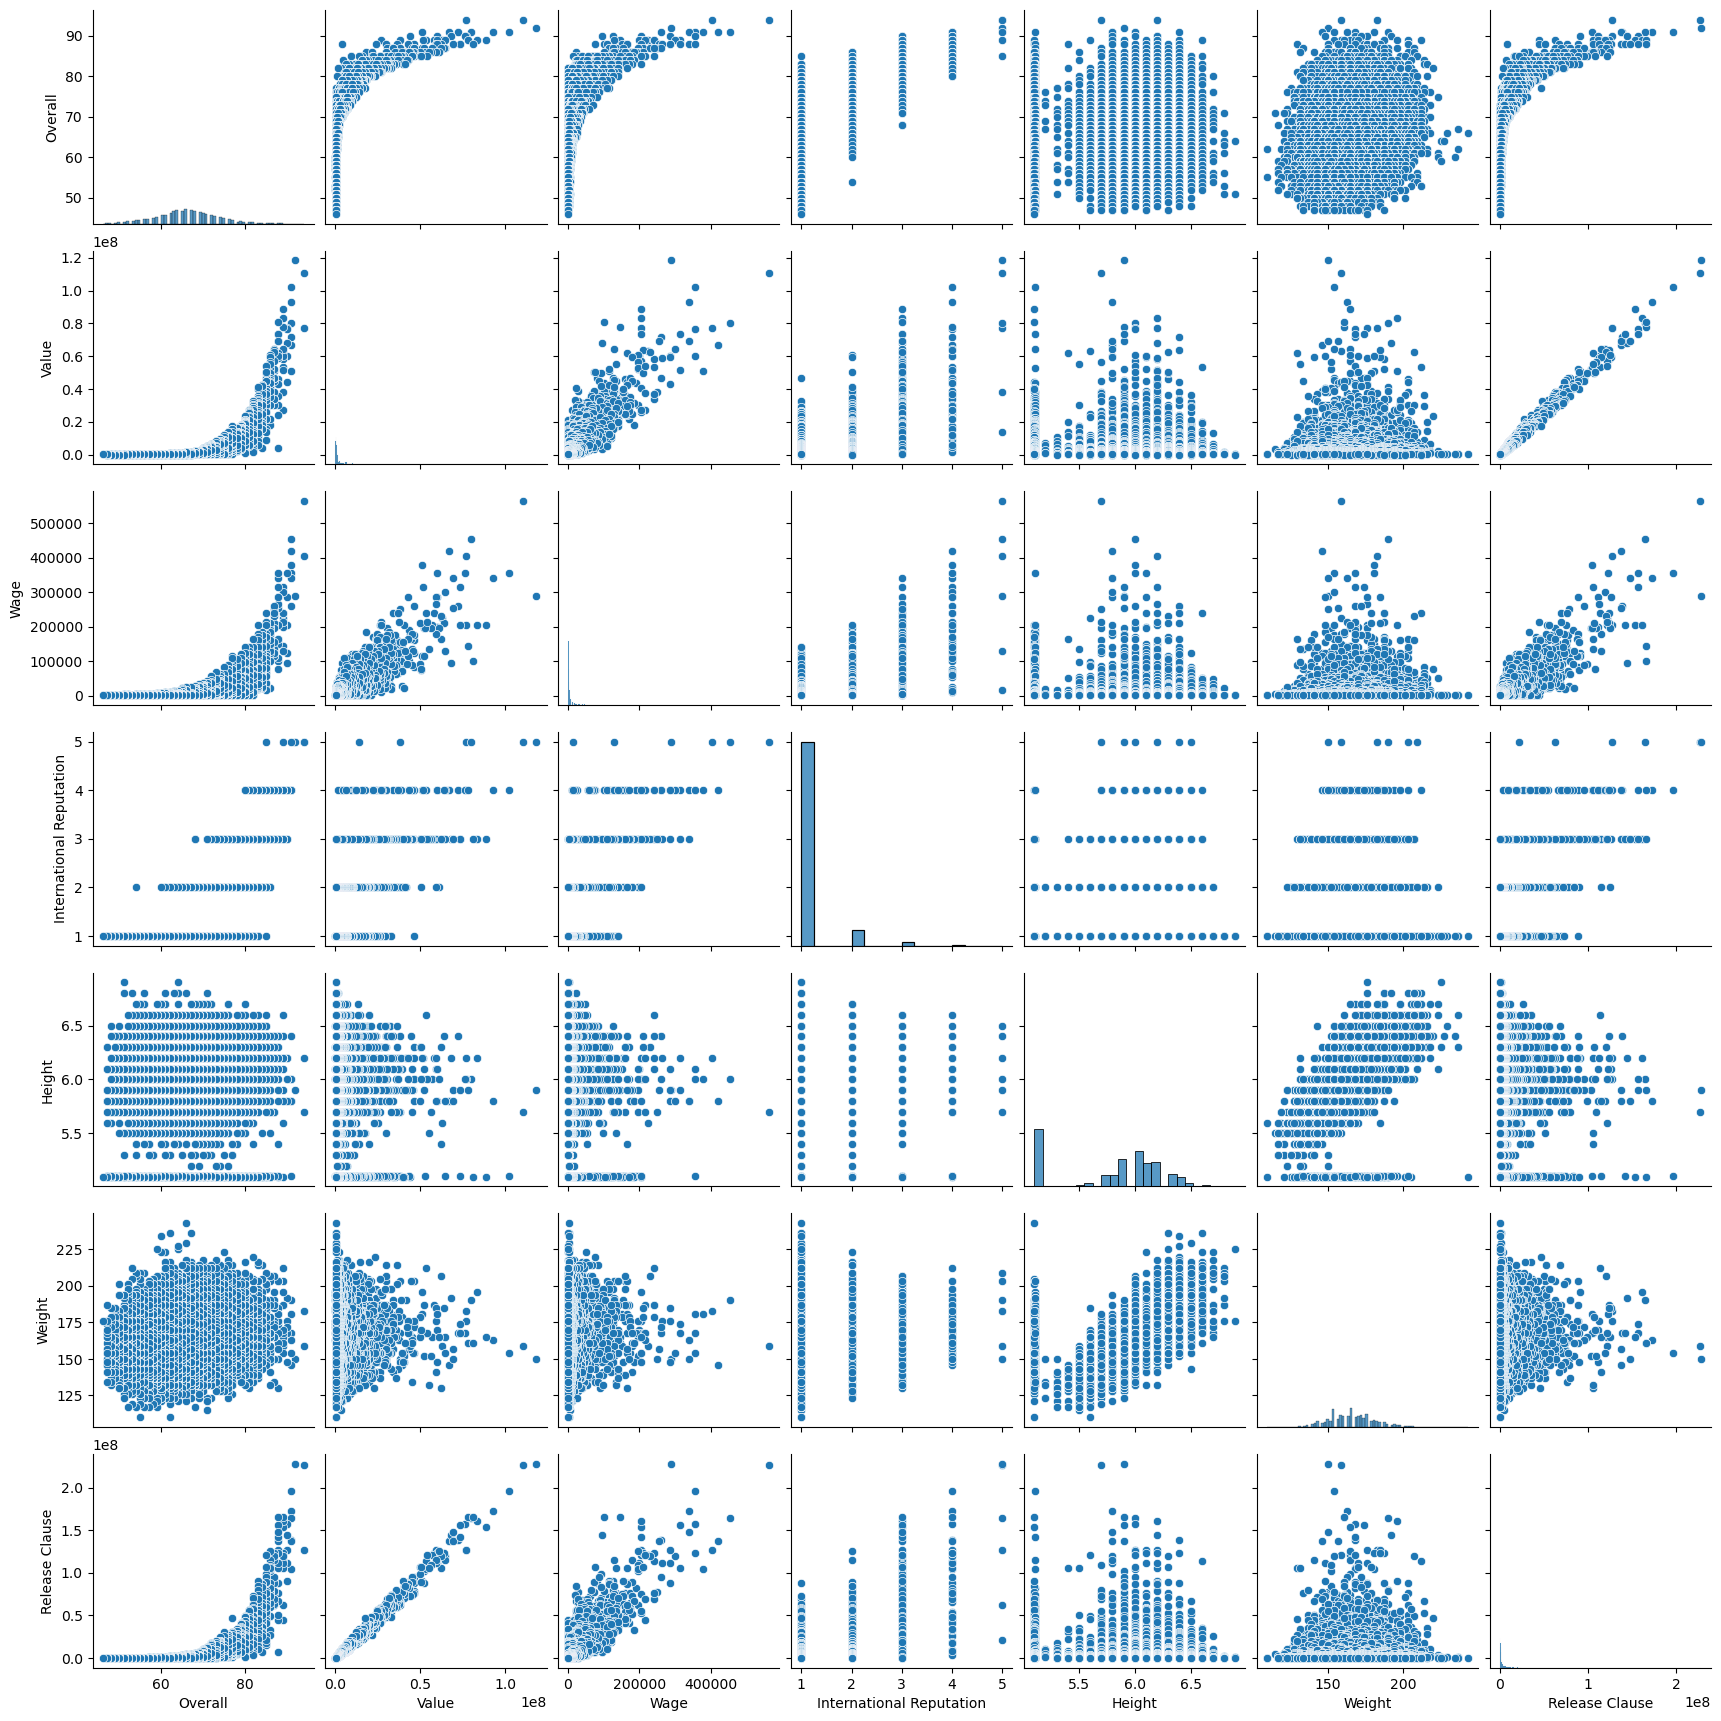

In [62]:
sns.pairplot(df[["Overall", "Value", "Wage", "International Reputation", "Height", "Weight", "Release Clause"]])
plt.savefig('Pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# E.A.3.
Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.




In [63]:
#Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

df1=df[df["Contract Valid Until"] == "2020"]
df1=df1.sort_values(by="Overall",ascending=False).reset_index().head(20)
df1.drop(columns="index",inplace=True)
df1["Age"].min()

26

In [71]:
df1

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,De Gea,27,Spain,91,93,Manchester United,"72,000,000.000000","260,000.000000",Right,4.000000,3.000000,1.000000,GK,2011,2020-01-01,6.400000,168.000000,17.000000,13.000000,21.000000,50.000000,13.000000,18.000000,21.000000,19.000000,51.000000,42.000000,57.000000,58.000000,60.000000,90.000000,43.000000,31.000000,67.000000,43.000000,64.000000,12.000000,38.000000,30.000000,12.000000,68.000000,40.000000,68.000000,15.000000,21.000000,13.000000,90.000000,85.000000,87.000000,88.000000,94.000000,"138,600,000.000000"
1,L. Modrić,32,Croatia,91,91,Real Madrid,"67,000,000.000000","420,000.000000",Right,4.000000,4.000000,4.000000,RCM,2012,2020-01-01,5.800000,146.000000,86.000000,72.000000,55.000000,93.000000,76.000000,90.000000,85.000000,78.000000,88.000000,93.000000,80.000000,72.000000,93.000000,90.000000,94.000000,79.000000,68.000000,89.000000,58.000000,82.000000,62.000000,83.000000,79.000000,92.000000,82.000000,84.000000,60.000000,76.000000,73.000000,13.000000,9.000000,7.000000,14.000000,9.000000,"137,400,000.000000"
2,Sergio Ramos,32,Spain,91,91,Real Madrid,"51,000,000.000000","380,000.000000",Right,4.000000,3.000000,3.000000,RCB,2005,2020-01-01,6.000000,181.000000,66.000000,60.000000,91.000000,78.000000,66.000000,63.000000,74.000000,72.000000,77.000000,84.000000,76.000000,75.000000,78.000000,85.000000,66.000000,79.000000,93.000000,84.000000,83.000000,59.000000,88.000000,90.000000,60.000000,63.000000,75.000000,82.000000,87.000000,92.000000,91.000000,11.000000,8.000000,9.000000,7.000000,11.000000,"104,600,000.000000"
3,E. Hazard,27,Belgium,91,91,Chelsea,"93,000,000.000000","340,000.000000",Right,4.000000,4.000000,4.000000,LF,2012,2020-01-01,5.800000,163.000000,81.000000,84.000000,61.000000,89.000000,80.000000,95.000000,83.000000,79.000000,83.000000,94.000000,94.000000,88.000000,95.000000,90.000000,94.000000,82.000000,56.000000,83.000000,66.000000,80.000000,54.000000,41.000000,87.000000,89.000000,86.000000,91.000000,34.000000,27.000000,22.000000,11.000000,12.000000,6.000000,8.000000,8.000000,"172,100,000.000000"
4,David Silva,32,Spain,90,90,Manchester City,"60,000,000.000000","285,000.000000",Left,4.000000,2.000000,4.000000,LCM,2010,2020-01-01,5.800000,148.000000,84.000000,76.000000,54.000000,93.000000,82.000000,89.000000,82.000000,77.000000,87.000000,94.000000,70.000000,64.000000,92.000000,90.000000,90.000000,72.000000,64.000000,78.000000,52.000000,75.000000,57.000000,50.000000,89.000000,92.000000,75.000000,93.000000,59.000000,53.000000,29.000000,6.000000,15.000000,7.000000,6.000000,12.000000,"111,000,000.000000"
5,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,"60,000,000.000000","200,000.000000",Right,4.000000,4.000000,3.000000,LS,2013,2020-01-01,6.100000,170.000000,70.000000,89.000000,89.000000,78.000000,90.000000,80.000000,77.000000,76.000000,52.000000,82.000000,75.000000,76.000000,77.000000,91.000000,59.000000,87.000000,88.000000,92.000000,78.000000,79.000000,84.000000,48.000000,93.000000,77.000000,85.000000,82.000000,52.000000,45.000000,39.000000,12.000000,5.000000,13.000000,13.000000,10.000000,"111,000,000.000000"
6,G. Chiellini,33,Italy,89,89,Juventus,"27,000,000.000000","215,000.000000",Left,4.000000,3.000000,2.000000,LCB,2005,2020-01-01,6.200000,187.000000,58.000000,33.000000,83.000000,59.000000,45.000000,58.000000,60.000000,31.000000,59.000000,57.000000,63.000000,75.000000,54.000000,82.000000,55.000000,78.000000,89.000000,65.000000,89.000000,49.000000,92.000000,88.000000,28.000000,50.000000,50.0

# E.A.3.a. 

What would the average wage for this set of players be?



In [64]:
df1["Wage"].mean()

205450.0

# INFERENCE : 

    * AVERAGE WAGE FOR THE TOP 20 PLAYERS IN TERMS OF OVERALL RATING IS 205450.0

# E.A.3.b.

What is the average age?

In [65]:
df1["Age"].mean()

30.65

# INFERENCE : 
    
    * AVERAGE AGE FOR THE TOP 20 PLAYERS IN TERMS OF OVERALL RATING IS 30.65

# E.A.3.c.

Is there a correlation between the Overall rating and Value for these players?

In [66]:
df1["Value"].corr(df1["Overall"])

0.7867166042074153

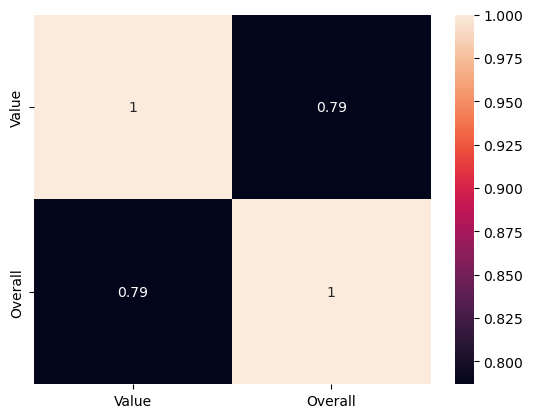

In [67]:
sns.heatmap(df1[["Value","Overall"]].corr(),annot=True)
plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# INFERENCE :
    
* There is high positive co-relationship between overall rating and market value

# 4. Generate tables containing the top 5 players by Overall rating for each unique position

In [68]:
top5=df.copy()
top5=top5.sort_values(by="Overall",ascending=False).groupby("Position").nth([0,1,2,3,4])
top5.reset_index()

,Position,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,CAM,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,"73,500,000.000000","205,000.000000",Right,3.000000,5.000000,4.000000,2013,2020-01-01,5.110000,168.000000,88.000000,80.000000,52.000000,91.000000,77.000000,84.000000,86.000000,87.000000,88.000000,91.000000,75.000000,73.000000,79.000000,88.000000,81.000000,84.000000,50.000000,92.000000,58.000000,89.000000,46.000000,56.000000,83.000000,91.000000,67.000000,88.000000,59.000000,57.000000,22.000000,9.000000,14.000000,7.000000,7.000000,6.000000,"141,500,000.000000"
1,CAM,T. Müller,28,Germany,86,86,FC Bayern München,"45,000,000.000000","135,000.000000",Right,4.000000,4.000000,3.000000,2008,2021-01-01,6.100000,165.000000,79.000000,87.000000,82.000000,83.000000,84.000000,75.000000,81.000000,59.000000,72.000000,82.000000,73.000000,75.000000,75.000000,91.000000,72.000000,78.000000,81.000000,87.000000,68.000000,80.000000,57.000000,58.000000,92.000000,85.000000,60.000000,83.000000,44.000000,41.000000,44.000000,6.000000,7.000000,11.000000,14.000000,14.000000,"74,300,000.000000"
2,CAM,Roberto Firmino,26,Brazil,86,87,Liverpool,"53,000,000.000000","195,000.000000",Right,3.000000,4.000000,4.000000,2015,2023-01-01,5.110000,168.000000,72.000000,87.000000,77.000000,86.000000,81.000000,87.000000,80.000000,65.000000,75.000000,88.000000,78.000000,77.000000,80.000000,86.000000,81.000000,81.000000,81.000000,90.000000,74.000000,76.000000,73.000000,58.000000,87.000000,85.000000,72.000000,87.000000,60.000000,64.000000,42.000000,8.000000,11.000000,9.000000,6.000000,10.000000,"104,700,000.000000"
3,CAM,M. Özil,29,Germany,86,86,Arsenal,"43,500,000.000000","190,000.000000",Left,4.000000,2.000000,4.000000,2013,2021-01-01,5.110000,168.000000,83.000000,73.000000,54.000000,89.000000,80.000000,84.000000,84.000000,77.000000,82.000000,90.000000,72.000000,69.000000,79.000000,84.000000,70.000000,70.000000,48.000000,69.000000,57.000000,75.000000,48.000000,24.000000,83.000000,91.000000,67.000000,82.000000,24.000000,16.000000,19.000000,6.000000,14.000000,10.000000,6.000000,14.000000,"82,700,000.000000"
4,CAM,A. Griezmann,27,France,89,90,Atlético Madrid,"78,000,000.000000","145,000.000000",Left,4.000000,3.000000,4.000000,2014,2023-01-01,5.900000,161.000000,82.000000,90.000000,84.000000,83.000000,87.000000,88.000000,84.000000,78.000000,76.000000,90.000000,88.000000,85.000000,90.000000,90.000000,80.000000,80.000000,90.000000,83.000000,62.000000,82.000000,69.000000,35.000000,91.000000,83.000000,79.000000,87.000000,59.000000,47.000000,48.000000,14.000000,8.000000,14.000000,13.000000,14.000000,"165,800,000.000000"
5,CB,D. Godín,32,Uruguay,90,90,Atlético Madrid,"44,000,000.000000","125,000.000000",Right,3.000000,3.000000,2.000000,2010,2019-01-01,6.200000,172.000000,55.000000,42.000000,92.000000,79.000000,47.000000,53.000000,49.000000,51.000000,70.000000,76.000000,68.000000,68.000000,58.000000,85.000000,54.000000,67.000000,91.000000,66.000000,88.000000,43.000000,89.000000,88.000000,48.000000,52.000000,50.000000,82.000000,90.000000,89.000000,89.000000,6.000000,8.000000,15.000000,5.000000,15.000000,"90,200,000.000000"
6,CB,Miranda,33,Brazil,85,85,Inter,"15,500,000.000000","96,000.000000",Right,3.000000,3.000000,2.000000,2017,2020-01-01,6.100000,172.000000,48.000000,43.000000,80.000000,70.000000,51.000000,67.000000,32.000000,39.000000,69.000000,73.000000,66.000000,69.000000,61.000000,81.000000,57.000000,70.000000,82.000000,65.000000,79.000000,41.000000,83.000000,85.000000,43.000000,58.000000,49.0000

# 4.a.

Are there any players appearing in more than one Table. Please point out such players.

In [69]:
top5["Name"].value_counts()[top5['Name'].value_counts() > 1]

Series([], Name: Name, dtype: int64)

# INFERENCE:
    
    * THERE ARE NO PLAYERS PRESENT IN MORE THAN ONE POSITION.

# 4.b.

What is the average wage one can expect to pay for the top 5 in every position?

In [70]:
top5.groupby("Position")["Wage"].mean()

Position
CAM   174,000.000000
CB    124,800.000000
CDM   199,200.000000
CF     47,400.000000
CM    134,600.000000
GK    192,800.000000
LAM    19,000.000000
LB    177,200.000000
LCB   162,000.000000
LCM   195,400.000000
LDM   103,800.000000
LF    123,200.000000
LM    169,000.000000
LS     92,200.000000
LW    261,000.000000
LWB    30,000.000000
RAM    46,600.000000
RB    155,400.000000
RCB   219,000.000000
RCM   257,400.000000
RDM   105,000.000000
RF    148,000.000000
RM    133,000.000000
RS    130,400.000000
RW    202,000.000000
RWB    44,200.000000
ST    294,000.000000
Name: Wage, dtype: float64

# INFERENCE:
    
    * Above Table gives the expecting average wage from each individual players respect to their position.